<a href="https://colab.research.google.com/github/diplomado-bigdata-machinelearning-udea/Curso2/blob/master/S6/S6_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

Empecemos por usar la versión 2 de de tensor flow:

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## **Clasificación con CNN - Arquitectura**

Como vimos las redes convolucionales surgen  a partir de trabajos inspirados en el estudio de la corteza cerebral de los animales y cómo estas reaccioban e interactuaban ante los estímulos visuales, es por esto que una de las principales tareas en las que se usan las redes convolucionales es en la clasificación de imagenes. Como vimos en la clase previa la arquitectura típica de una red convolucional es la siguiente:

<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/BqlLRkJ.png" align="center" hspace="10px" vspace="0px"></p>


Si bien existen multiples arquitecturas que varían ciertas características, esta es la forma básica que sigue una red convolucional (convolución-pooling-convolución-pooling y así sucesivamente), la cual a la hora de tener una clasificación se definirá simplemente por la capa de salida que tendrá nuestra red densa conectada al final de la parte de convolución, es decir, tendremos de acuerdo a nuestro objetivo la salida correspondiente, ya sea con una activación softmax o sigmoid por ejemplo.

Veamos un ejemplo de clasificación a partir de construir una red convolucional para el **MNIST database of handwritten digits** dataset.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Veamos la cantidad de elementos que tenemos en cada conjunto


In [ ]:
print('Datos de entrenamiento:',X_train.shape)
print('Datos de test:',X_test.shape)

Datos de entrenamiento: (60000, 28, 28)
Datos de test: (10000, 28, 28)


Vamos a normalizar los datos

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

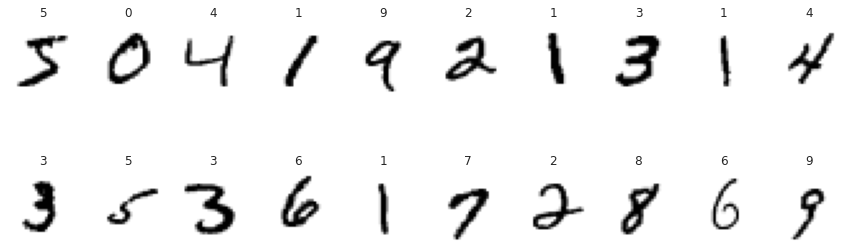

In [ ]:
fig,ax=plt.subplots(2,10,figsize=(15,5))
for i,ax in enumerate(ax.flat):
  ax.imshow(X_train[i],cmap='binary')
  ax.set_axis_off()
  ax.set_title(y_train[i])

Como vemos en el dataset tenemos un conjunto de números escritos a mano, ahora construyamos una red convolucional qu me permita hacer predicción de sus etiquetas

In [ ]:
keras.backend.clear_session()

In [ ]:
model=keras.models.Sequential([
                               keras.layers.Conv2D(40,kernel_size=3,strides=1,padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)),
                               keras.layers.MaxPool2D(pool_size=2),
                               keras.layers.Conv2D(80,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer='he_uniform'),
                               keras.layers.MaxPool2D(pool_size=2),
                               keras.layers.Conv2D(100,kernel_size=3,strides=2,padding='valid',activation='relu',kernel_initializer='he_uniform'),
                               keras.layers.MaxPool2D(pool_size=2),
                               keras.layers.Flatten(),
                               keras.layers.Dense(50,activation='relu',kernel_initializer='he_uniform'),
                               keras.layers.Dense(20,activation='relu',kernel_initializer='he_uniform'),
                               keras.layers.Dense(10,activation='softmax')
])

In [ ]:
keras.layers.Conv2D?

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [ ]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 17s 5ms/step - loss: 0.2536 - accuracy: 0.9227 - val_loss: 0.0836 - val_accuracy: 0.9758
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0771 - accuracy: 0.9771 - val_loss: 0.1027 - val_accuracy: 0.9677
Epoch 3/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0484 - accuracy: 0.9846 - val_loss: 0.0593 - val_accuracy: 0.9839
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0369 - accuracy: 0.9880 - val_loss: 0.0582 - val_accuracy: 0.9823
Epoch 5/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.0652 - val_accuracy: 0.9816
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0520 - val_accuracy: 0.9852
Epoch 7/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0853 - val_accuracy

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0475 - accuracy: 0.9864


[0.04752027243375778, 0.9864000082015991]

Como anotación, con las redes convolucionales podemos realizar no solo clasificación, sino además tareas como la de localización, donde queremos predecir una caja como frontera alrededor de un objeto, donde esta vez no solo debemos predecir la clasificación del objeto sino que además debemos obtener las coordenadas de la caja en forma de frontera.


<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/nxg6gy9.png" align="center" hspace="10px" vspace="0px"></p>

Donde quizás lo mas complicado es tener un dataset con estas etiquetas, por lo tanto una parte ardua de la detección es lograr etiquetar nuestro conjunto de imagenes con las fronteras correspondientes, para esto se pueden usar herramientas de etiquetado como VGG Image Annotator, LabelImg, OpenLabeler or ImgLab. [link](https://arxiv.org/pdf/1611.02145.pdf)

# Ejercicio usando Cifar100

Importemos algunas librerias que seran de utilidad

In [ ]:
%tensorflow_version 2.x

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras 


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


importemos los datos usando keras

In [ ]:
(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 3s 0us/step


In [ ]:
train_label

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [ ]:
test_image.shape

(10000, 32, 32, 3)

In [ ]:
train_image.shape

(50000, 32, 32, 3)

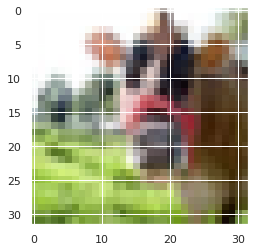

In [ ]:
plt.imshow(train_image[0])

veamos algunas de las figuras que contiene el dataset

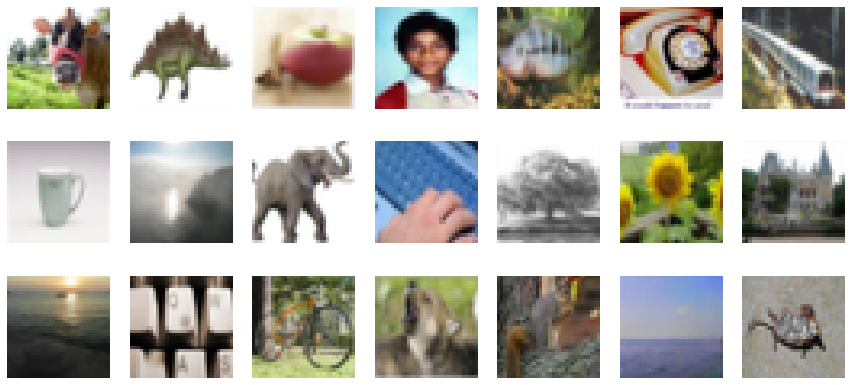

In [ ]:
fig , ax = plt.subplots(3,7, figsize=(15,7))
for i, ax in enumerate(ax.flat):
  ax.imshow(train_image[i], cmap='Greys')
  ax.axis('off')

escalemos los datos en un rango de 0 a 1

In [ ]:
train_image = train_image / 255.0
test_image = test_image / 255.0

In [ ]:
keras.backend.clear_session()

creemos nuestro modelo de CNN usando keras

In [ ]:
model = keras.models.Sequential([
      keras.layers.Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same',strides=(1,1) ,input_shape=(32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same',strides=(1,1) ,input_shape=(32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.3),

      keras.layers.Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.3),

      keras.layers.Conv2D(128, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(128, kernel_size=3, activation='elu', kernel_initializer='he_normal',  padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.4),

      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='elu', kernel_initializer='he_normal'),

      keras.layers.Dropout(0.5),

      keras.layers.Dense(100, activation='softmax')
      
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

usemos early stopping en nuestro modelo 

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

procedamos a entrenar nuestro modelo

In [ ]:
model.fit(train_image, train_label, epochs=30, validation_split=0.2 , batch_size=64, callbacks=[early_stopping])

Epoch 1/30
625/625 [==============================] - 11s 13ms/step - loss: 4.4503 - accuracy: 0.0653 - val_loss: 3.8331 - val_accuracy: 0.1248
Epoch 2/30
625/625 [==============================] - 7s 11ms/step - loss: 3.5158 - accuracy: 0.1649 - val_loss: 2.9709 - val_accuracy: 0.2620
Epoch 3/30
625/625 [==============================] - 7s 11ms/step - loss: 3.0893 - accuracy: 0.2364 - val_loss: 2.6870 - val_accuracy: 0.3212
Epoch 4/30
625/625 [==============================] - 7s 11ms/step - loss: 2.8453 - accuracy: 0.2849 - val_loss: 2.5128 - val_accuracy: 0.3522
Epoch 5/30
625/625 [==============================] - 7s 11ms/step - loss: 2.6720 - accuracy: 0.3205 - val_loss: 2.3502 - val_accuracy: 0.3887
Epoch 6/30
625/625 [==============================] - 7s 11ms/step - loss: 2.5439 - accuracy: 0.3447 - val_loss: 2.3444 - val_accuracy: 0.3872
Epoch 7/30
625/625 [==============================] - 7s 11ms/step - loss: 2.4430 - accuracy: 0.3645 - val_loss: 2.2538 - val_accuracy: 0.411

In [ ]:
model.evaluate(test_image, test_label, verbose=0)

[1.6750017404556274, 0.5454000234603882]

# Arquitecturas de CNNs (más complejas)

A lo largo de los años, se han desarrollado variantes la arquitectura fundamental que de una CNN que vimos en la sesión pasar. Dichas arquidecturas nuevas han contrubuido en el avance de este campo. Una buena medida del progreso es la tasa de error obtenidas en competencias como el desafío ILSVRC ImageNet. En esta competencia, la tasa de error entre las 5 mejores arquitecturas para la clasificación de imágenes cayó del 26% a menos del 2,3% en solo seis años. A continuación se muestra la tabla de arquitecturas con mayor presición, o menor tasa de error:

<p><img alt="Colaboratory logo" height="430px" src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/competition.png?raw=true" align="center" hspace="10px" vspace="0px"></p> 


En lo que respecta a nosotros estudiaremos la arquitectura de dos CNN de ellas, dada su importacia:


1. VGGNet16

2. ResNet

Debido al costo computacional tan elevado que representa entrenar dichas redes, Keras lo hizo ya por nosotros!. Importaremos el pesos preentrenados de estas dos arquitecturas. Para mayor información consultar el siguiente [link](https://keras.io/applications/)

**VGGNet**

El segundo lugar en el desafío ILSVRC 2014 lo obtubo VGGNet14, desarrollado por K. Simonyan y A. Zisserman. Tenía una arquitectura muy simple y clásica, con 2 o 3 capas convolucionales, una capa de agrupación, luego nuevamente 2 o 3 capas convolucionales, una capa de agrupación, etc. (con un total de solo 16 capas convolucionales), más una red densa al final con 2 capas ocultas y la capa de salida. Solo usó 3 × 3 filtros, pero muchos filtros.

<p><img alt="Colaboratory logo" height="400px" src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/VGG16-Architecture-with-Softmax-layer-replaced-used-as-the-base-model-for-each-classifier.png?raw=true" align="center" hspace="10px" vspace="0px"></p> 

--2022-10-01 15:33:22--  https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168370 (164K) [image/jpeg]
Saving to: ‘indian_elephant.jpg’

indian_elephant.jpg 100%[===================>] 164.42K  --.-KB/s    in 0.1s    

2022-10-01 15:33:23 (1.48 MB/s) - ‘indian_elephant.jpg’ saved [168370/168370]

--2022-10-01 15:33:23--  https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ssanchezgoe/diplomado_udea/raw/master/image/african_elephant_bull.jpg [following]
--2022-10-01 15:33:23--  https://

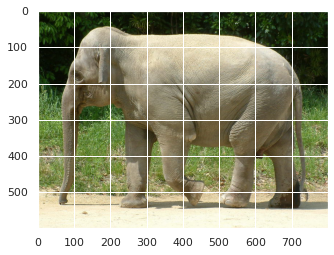

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Indian elephant
!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O indian_elephant.jpg
# African elephant
!wget https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true -O african_elephant.jpg

# Choose the elephant to be classified
img_path = 'indian_elephant.jpg'

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)

In [ ]:
!wget https://www.cdbp.gob.cl/sites/www.cdbp.gob.cl/files/images/articles-82855_imagen_01.jpg

--2022-10-01 15:47:40--  https://www.cdbp.gob.cl/sites/www.cdbp.gob.cl/files/images/articles-82855_imagen_01.jpg
Resolving www.cdbp.gob.cl (www.cdbp.gob.cl)... 186.67.125.31
Connecting to www.cdbp.gob.cl (www.cdbp.gob.cl)|186.67.125.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239211 (234K) [image/jpeg]
Saving to: ‘articles-82855_imagen_01.jpg’

articles-82855_imag 100%[===================>] 233.60K   215KB/s    in 1.1s    

2022-10-01 15:47:42 (215 KB/s) - ‘articles-82855_imagen_01.jpg’ saved [239211/239211]



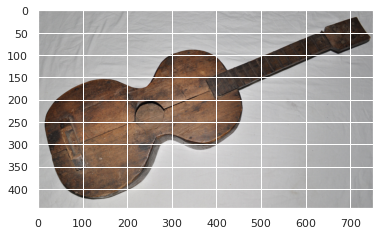

In [ ]:
img2 = mpimg.imread('articles-82855_imagen_01.jpg')
imagen= plt.imshow(img2)

In [ ]:
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

553476096/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)

features = model.predict(x)

print("Prediction", keras.applications.vgg16.decode_predictions(features, top=3)[0])

Prediction [('n02504013', 'Indian_elephant', 0.71757245), ('n02504458', 'African_elephant', 0.2431454), ('n01871265', 'tusker', 0.036462087)]


In [ ]:
g = np.array([1,2,3])
g.shape

(3,)

In [ ]:
h = np.expand_dims(g, axis=0)
h.shape
h

array([[1, 2, 3]])

In [ ]:
x.shape

(1, 224, 224, 3)

**ResNet**

El desafío de ILSVRC 2015 fue ganado mediante una Red Residual (o ResNet), desarrollada por Kaiming He et al., lográndose una tasa de error inferior a 3.6%, usando una CNN muy profunda compuesta de 152 capas. La clave para poder entrenar una red tan profunda es usar skip connections (también llamadas conexiones de atajo): la señal que alimenta a una capa también se agrega a la salida de una capa ubicada un poco más arriba en la pila. 

Lo anterior resulta útil ya que, al entrenar una red neuronal, el objetivo es hacer que modele una función objetivo $h(x)$. Si agrega la entrada $x$ a la salida de la red (es decir, agrega una skip connection), la red se verá obligada a modelar $f(x) = h (x) - x$ en lugar de $h(x)$. Esto se llama aprendizaje residual (ver Figura 14-15).

<p><img alt="Colaboratory logo" height="350px" src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/resnet.png?raw=true" align="center" hspace="10px" vspace="0px"></p>

In [ ]:
keras.backend.clear_session()

from keras.applications.resnet import ResNet50
#from keras.applications.resnet50 import preprocess_input, decode_predictions


import numpy as np

model = keras.applications.resnet50.ResNet50(weights='imagenet')
model.summary()

In [ ]:
img = image.load_img('articles-82855_imagen_01.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.resnet50.preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', keras.applications.resnet50.decode_predictions(preds, top=3)[0])

Predicted: [('n03498962', 'hatchet', 0.2308194), ('n02787622', 'banjo', 0.22803804), ('n03272010', 'electric_guitar', 0.08382526)]


# Transfer learning (transferencia de aprendizaje)
Como hemos visto las DNN deben ser entrenadas en varias épocas, usando algoritmos como el de backpropagation para actualizar los pesos y poco a poco reducir la perdida. Dicho proceso puede consumir una gran cantidad de recursos, monetarios, temporales o computacionales.

Por ello se ha implementado una técnica llamada transferencia de aprendizaje, en la cuál se usan los pesos entrenados de alguna red que realice una tarea parecida a aquella que queremos resolver. Así no se realizará un entrenamiento partiendo de pesos inicializados de manera aleatoria, si no de pesos que ya han creado filtros adecuados para la tarea dada.

Con un modelo preentrenado podemos hacer tres cosas:


*   Usarlo como nos es entregado para la tarea que deseamos (por ejemplo usar VGG como un clasificador de imagenes con 1000 clases)
*   Usar sus pesos (o parte de ellos) como extractor de características previo al uso de nuestra propia DNN. (Los pesos del modelo prenetrenado no se van a actualizar en posteriores etápas de entrenamiento o fine tuning)
*    Usar los pesos (o parte de ellos) como parte de nuestra red neuronal, puediendo actualizar o no alguna de las capas en posteriores etápas de entrenamiento o fine tuining.







### ¿Por qué funciona el transfer learning?
Para explicar porqué funciona ésta estrategia debemos recordar como funcionan las redes convolucionales (aunque la tranferencia de aprendizaje puede usarse para cualquier arquitectura).

![CNN](https://miro.medium.com/max/2344/1*3aT9KWCeQ6wIYdLLhD4mCw.png)

Las capas convolucionales irán creando poco a poco mapas de características que minimicen la función de perdida, dichos mapas, como ya dijimos, serán más simples en las capas iniciales (generando kernels que detectan colores o lineas básicas) y a medida que la red se hace más profunda dichas características se irán mezclando y creando kernels más complejos (detectando rostros completos, ojos u otras características complejas de nuestros datos).


Veamos por ejemplo en las siguientes imagenes los filtros y las partes de las imágenes qué más activan dichos filtros:
![alt text](https://miro.medium.com/max/907/1*jPCEik198_CjtmSL2H6o4g.png)
![alt text](https://miro.medium.com/max/818/1*1Y6HZxK-lOmqB8KnizTCow.png)

Note como en las primeras capas el modelo reconoce lineas simples y colores, y en las últimas  los filtros se han complejizado suficiente como para activar rostros completos.

De éste ejemplo es claro que, si tenemos problemas relativamente parecidos o si los filtros aprendidos por nuestra red son útiles en otros problemas será mejor inicializar nuestros pesos con dichos filtros y no de una forma aleatoria.
Por ejemplo, si nuestra tarea es clasificar gatos y perros, será mejor iniciar con dicha red (que ya ha creado filtros para ellos) que hacerlo desde cero, y, de ser necesario, hacer un fine tuning de la red con nuevos ejemplos.

En keras tenemos algunas redes preentrenadas, todas ellas bastante buenas y de uso libre. [Ver acá algunos modelos preentrenados en Keras](https://keras.io/applications/)

Hagamos un ejemplo del uso de VGG16 en keras para hacer transferencia de aprendizaje

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16()
model.summary()

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                        

Hemos cargado el modelo VGG16, claramente más complejo que aquellos que hemos usado hasta ahora y sin embargo el más simple en nuestra colección de modelos preentrenados.

Veamos cómo usarlo.

In [ ]:
!wget 'https://pbs.twimg.com/profile_images/973248614469312512/ffd7wIOW_400x400.jpg'

--2022-10-01 15:57:44--  https://pbs.twimg.com/profile_images/973248614469312512/ffd7wIOW_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 146.75.36.159, 2a04:4e42:78::159
Connecting to pbs.twimg.com (pbs.twimg.com)|146.75.36.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18464 (18K) [image/jpeg]
Saving to: ‘ffd7wIOW_400x400.jpg’

ffd7wIOW_400x400.jp 100%[===================>]  18.03K  --.-KB/s    in 0s      

2022-10-01 15:57:44 (134 MB/s) - ‘ffd7wIOW_400x400.jpg’ saved [18464/18464]



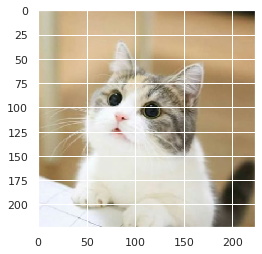

tabby (31.83%)


In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
#carguemos la imagen y preprocesemosla
image = load_img('ffd7wIOW_400x400.jpg', target_size=(224, 224)) #VGG necesita imagenes de 224x224 pixeles
plt.imshow(image)
plt.show()
image = img_to_array(image)

#procesamos la imagen con el mismo preprocesado que se aplicó a las imagenes de entrenamiento
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
#cargamos el modelo y predecimos las probabilidades
model = VGG16()
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]

print('%s (%.2f%%)' % (label[1], label[2]*100))

En éste ejemplo, usando la red como clasificador vemos que nos dice que la imagen es de un gato y además que es un gato de raza atigrado (tabby) con una certeza de 31.8% (el resto de la probabilidad se reparte entre las otras 999 clases)

Usemos ahora VGG como un preprocesador para hacer extracción de características.

En éstos casos se saca provecho del hecho de que cada capa está extrayendo información de ciertas características de la imagen, podemos usar las salidas de dichas capas como entradas para nuestros propios modelos, usandolos de manera efectiva como estractores de features.

En éste caso usaremos la pa penúltima capa fully conected con 4096 neuronas como salida, es decir "mocharemos" las capas posteriores a dicha capa de la arquitectura, y ésta salida alimentará nuestra pequeña red neuronal.

Note que en el ejemplo anterior hemos definido el modelo no de forma secuencial si no funcional.

Ahora si lo que queremos es que algunas de las capas no se entrenen (congelar los pesos), debemos poner la bandera "trainable =False".

In [ ]:
model = VGG16(include_top=False, input_shape=(300, 300, 3))
for layer in model.layers:
	layer.trainable = False
%tensorflow_version 2.x

58900480/58889256 [==============================] - 0s 0us/step
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
VGG16?

In [ ]:
model.layers

Acá podemos congelar cuantas capaz deseemos y posteriormente entrenar las demás.

El uso de la transferencia de aprendizaje nos ayuda a mejorar los tiempos de entrenamiento, a mejorar las capacidades predictivas y a realizar nuevas tareas aprovechando los modelos y procesos de entenamiento realizados anteriormente (construir sobre lo construído).

# Ejercicio: Transfer Learning

Importar las librerías y los datos

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [ ]:
from matplotlib import pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')


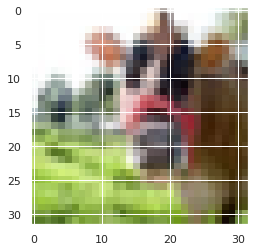

In [ ]:
plt.imshow(x_train[0])

Preprocesar los datos de acuerdo a los parámetros de VGG16

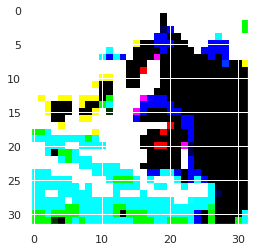

In [ ]:
x_train=preprocess_input(x_train)
x_test=preprocess_input(x_test)
plt.imshow(x_train[0])

Cargar la base convolucional de VGG16 (Sin la parte densa)

In [ ]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(32, 32, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Congelar las capas convolucionales excepto las últimas 4

In [ ]:
conv_base.layers[3]

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False
for layer in conv_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f79fa5e5d90> False
<keras.layers.convolutional.Conv2D object at 0x7f79fa62e890> False
<keras.layers.convolutional.Conv2D object at 0x7f79fa8bb890> False
<keras.layers.pooling.MaxPooling2D object at 0x7f79fa5c8990> False
<keras.layers.convolutional.Conv2D object at 0x7f79fa8c59d0> False
<keras.layers.convolutional.Conv2D object at 0x7f79fa8c5750> False
<keras.layers.pooling.MaxPooling2D object at 0x7f79fa8bb550> False
<keras.layers.convolutional.Conv2D object at 0x7f79fa8c55d0> False
<keras.layers.convolutional.Conv2D object at 0x7f79fa6286d0> False
<keras.layers.convolutional.Conv2D object at 0x7f79fa8c6310> False
<keras.layers.pooling.MaxPooling2D object at 0x7f79fa8bb710> False
<keras.layers.convolutional.Conv2D object at 0x7f79fa8e79d0> False
<keras.layers.convolutional.Conv2D object at 0x7f79fa615bd0> False
<keras.layers.convolutional.Conv2D object at 0x7f79fa8e7a90> False
<keras.layers.pooling.MaxPooling2D object at 0x7f79fa8e0110>

Crear el resto del modelo, agregando las capas densas

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))

model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_7 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 512)              

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2341 - acc: 0.6394 - val_loss: 3.4602 - val_acc: 0.4942
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0716 - acc: 0.6836 - val_loss: 4.0379 - val_acc: 0.4875
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9680 - acc: 0.7103 - val_loss: 2.4834 - val_acc: 0.4942
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8801 - acc: 0.7338 - val_loss: 2.8643 - val_acc: 0.4994
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7386 - acc: 0.7747 - val_loss: 3.0592 - val_acc: 0.4925
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6628 - acc: 0.7967 - val_loss: 3.8593 - val_acc: 0.4749
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5658 - acc: 0.8264 - val_loss: 3.3686 - val_acc: 0.4915
Epoch 8/10
1563/1563 [==========================

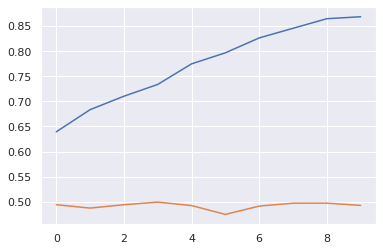

In [ ]:
plt.plot(pd.DataFrame(history.history)['acc'])
plt.plot(pd.DataFrame(history.history)['val_acc'])

In [ ]:
pd.DataFrame(history.history)['acc']

0    0.63940
1    0.68356
2    0.71028
3    0.73378
4    0.77474
5    0.79674
6    0.82636
7    0.84556
8    0.86466
9    0.86856
Name: acc, dtype: float64

In [ ]:
pd.DataFrame(history.history)

,loss,acc,val_loss,val_acc
0,3.578214,0.14712,5.539731,0.1747
1,2.704812,0.27758,174.970169,0.0255
2,2.432563,0.34440,2.965905,0.3859
3,2.261436,0.38442,2.315758,0.3891
4,2.064306,0.43096,2.481659,0.4350
5,1.891220,0.47614,4.527698,0.1689
6,1.806513,0.49566,2.850608,0.4596
7,1.626430,0.54302,3.494344,0.4732
8,1.475849,0.57788,3.599015,0.4861
9,1.351771,0.61026,2.374225,0.4903


In [ ]:
model.evaluate(test_image, test_label, verbose=0)

[7.189935207366943, 0.009999999776482582]